In [17]:
%matplotlib inline
import pandas as pd
import dateutil.parser
from collections import defaultdict
import matplotlib.pyplot as plt

In [11]:
!ls data

fashion  koiedata.csv


## Read and process the data

In [12]:
df = pd.read_csv("data/koiedata.csv", encoding="utf-8")
df.head(5)

,koiename,n_mem,n_non_mem,date
0,Agdenes,2,0,1999-10-08
1,Agdenes,5,2,1999-10-09
2,Agdenes,6,1,1999-10-15
3,Agdenes,6,1,1999-10-16
4,Agdenes,5,5,1999-10-22


Create categorical column, and parse dates to date object. Duplicate date into columns for differenct components and extract values.

In [13]:
df["koiename"] = pd.Categorical(df.koiename)
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.strftime('%U')
df["day_of_week"] = df["date"].dt.weekday
df = df.drop("date", axis=1)
df.head(2)

,koiename,n_mem,n_non_mem,year,month,week,day_of_week
0,Agdenes,2,0,1999,10,40,4
1,Agdenes,5,2,1999,10,40,5


## Some stats
### Distribution of entries per month

In [30]:
per_cabin = defaultdict(int)
per_month = defaultdict(int)
per_year = defaultdict(int)
for _, row in df.iterrows():
    per_cabin[row["koiename"]] += 1
    per_month[row["month"]] += 1
    per_year[row["year"]] += 1

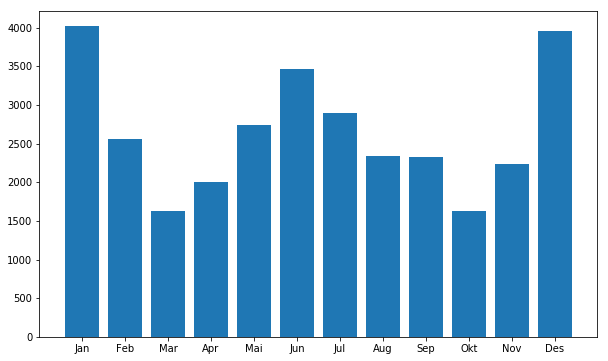

In [28]:
plt.figure(figsize=(10,6))
plt.bar(["Jan", "Feb", "Mar", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Des"], per_month.values());

## Distribution of entries per cabin

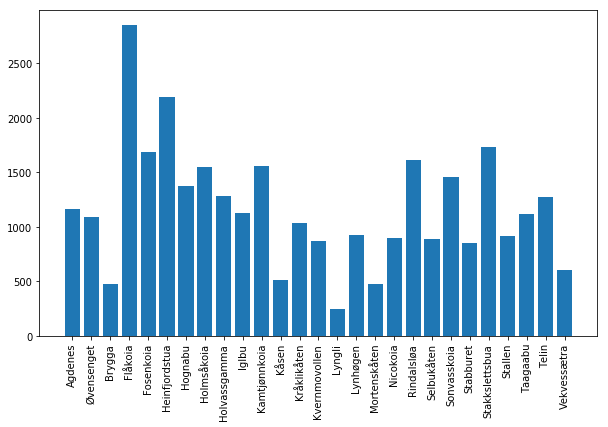

In [31]:
plt.figure(figsize=(10,6))
plt.xticks(rotation="vertical")
plt.bar(per_cabin.keys(), per_cabin.values());

## Entries per year

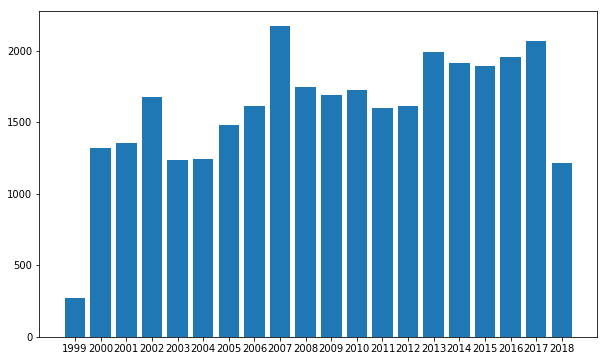

In [35]:
plt.figure(figsize=(10,6))
plt.bar(list(map(str, per_year.keys())), per_year.values());